# Entity Data Science Final Project 
# Honey vs Agricultural Commodity Production 
## Nic Acosta
7/2022

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

1. Does honey production correlate with the production of any other USDA commodities in your category/group? Which are more highly correlated? 
2. Have the production levels of each commodity in your category changed over time? - Linear Modeling / MANCOVA
 3. Other relevant / interesting findings about your category

 pulling in libraries

 Pulling in and printing data csv

In [8]:
USDAHoney2 = pd.read_csv(r'\Users\airos\Downloads\USDAHoney2.csv', low_memory=False)
print(USDAHoney2)

      Unnamed: 0   Commodity_Description Country_Code   Country_Name  Year  \
0              1  Almonds, Shelled Basis           US  United States  1998   
1              2  Almonds, Shelled Basis           US  United States  1999   
2              3  Almonds, Shelled Basis           US  United States  2000   
3              4  Almonds, Shelled Basis           US  United States  2001   
4              5  Almonds, Shelled Basis           US  United States  2002   
...          ...                     ...          ...            ...   ...   
8308        8309                   Honey           US  United States  2008   
8309        8310                   Honey           US  United States  2009   
8310        8311                   Honey           US  United States  2010   
8311        8312                   Honey           US  United States  2011   
8312        8313                   Honey           US  United States  2012   

     Attribute_Description Unit_Description         Value  Cate

.

sorted the columns into rows to view

.

In [10]:
for col_name in USDAHoney2.columns:
    print(col_name)

Unnamed: 0
Commodity_Description
Country_Code
Country_Name
Year
Attribute_Description
Unit_Description
Value
Category


.

Going through each column to see unique input values

.

In [12]:
USDAHoney2.Country_Code.unique()

array(['US'], dtype=object)

In [13]:
USDAHoney2.Commodity_Description.unique()

array(['Almonds, Shelled Basis', 'Animal Numbers, Cattle',
       'Animal Numbers, Swine', 'Apple Juice, Concentrated',
       'Apples, Fresh', 'Asparagus, Fresh', 'Avocados, Fresh', 'Barley',
       'Citrus, Other, Fresh', 'Coffee, Green', 'Corn', 'Cotton',
       'Dairy, Butter', 'Dairy, Cheese', 'Dairy, Dry Whole Milk Powder',
       'Dairy, Milk, Fluid', 'Dairy, Milk, Nonfat Dry',
       'Filberts, Inshell Basis', 'Fresh Apricots',
       'Fresh Cherries,(Sweet&Sour)', 'Fresh Peaches & Nectarines',
       'Fresh Plums & Prunes', 'Grapefruit, Fresh',
       'Grapes, Table, Fresh', 'Kiwifruit', 'Lemons, Fresh',
       'Macadamia, Inshell Basis', 'Meal, Cottonseed', 'Meal, Fish',
       'Meal, Peanut', 'Meal, Rapeseed', 'Meal, Soybean',
       'Meal, Sunflowerseed', 'Meat, Beef and Veal', 'Meat, Swine',
       'Oats', 'Oil, Coconut', 'Oil, Cottonseed', 'Oil, Olive',
       'Oil, Palm', 'Oil, Palm Kernel', 'Oil, Peanut', 'Oil, Rapeseed',
       'Oil, Soybean', 'Oil, Sunflowerseed', 'Oi

In [14]:
USDAHoney2.Country_Name.unique()

array(['United States'], dtype=object)

In [15]:
USDAHoney2.Attribute_Description.unique()

array(['Production'], dtype=object)

In [16]:
USDAHoney2.Unit_Description.unique()

array(['(MT)', '(1000 HEAD)', '(1000 MT)', '(1000 60 KG BAGS)',
       '1000 480 lb. Bales', '(1000 MT CWE)', '(MT, Net Weight)',
       '(MIL PCS)', 'MT'], dtype=object)

In [17]:
USDAHoney2.Value.unique()

array([235884.     , 361362.     , 303700.     , ...,  79511.60546,
        66768.90159,  63914.00613])

In [18]:
USDAHoney2.Category.unique()

array([4, 1, 2, 3, 5, 6], dtype=int64)

In [19]:
TrimmedUSDAHoney2 = USDAHoney2.drop(['Unnamed: 0', 'Country_Name'], axis=1)

In [20]:
for col_name in TrimmedUSDAHoney2.columns:
    print(col_name)

Commodity_Description
Country_Code
Year
Attribute_Description
Unit_Description
Value
Category


.

Dropping anything null and printing the first couple data rows...

.

Changed the Units to Metric Tons

In [24]:
TrimmedUSDAHoney2 = TrimmedUSDAHoney2[TrimmedUSDAHoney2.Unit_Description != '(1000 HEAD)']
TrimmedUSDAHoney2 = TrimmedUSDAHoney2[TrimmedUSDAHoney2.Unit_Description != '(MIL PCS)']
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(1000 60 KG BAGS)", "Value"] = (TrimmedUSDAHoney2.Value * 1000 * .001 * 60)
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(1000 60 KG BAGS)", "Unit_Description"] = "(MT)"
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(MT, Net Weight)", "Unit_Description"] = "(MT)"
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(1000 MT)", "Value"] = (TrimmedUSDAHoney2.Value * 1000)
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "(1000 MT)", "Unit_Description"] = "(MT)"
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "1000 480 lb. Bales", "Value"] = (TrimmedUSDAHoney2.Value * 1000 * .00045 * 480)
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "1000 480 lb. Bales", "Unit_Description"] = "(MT)"
TrimmedUSDAHoney2.loc[TrimmedUSDAHoney2["Unit_Description"] == "MT", "Unit_Description"] = "(MT)"

In [25]:
TrimmedUSDAHoney2

,Commodity_Description,Country_Code,Year,Attribute_Description,Unit_Description,Value,Category
0,"Almonds, Shelled Basis",US,1998,Production,(MT),235884.00000,4
1,"Almonds, Shelled Basis",US,1999,Production,(MT),361362.00000,4
2,"Almonds, Shelled Basis",US,2000,Production,(MT),303700.00000,4
3,"Almonds, Shelled Basis",US,2001,Production,(MT),376488.00000,4
4,"Almonds, Shelled Basis",US,2002,Production,(MT),494416.00000,4
...,...,...,...,...,...,...,...
8308,Honey,US,2008,Production,(MT),73922.46948,6
8309,Honey,US,2009,Production,(MT),65801.39412,6
8310,Honey,US,2010,Production,(MT),79511.60546,6
8311,Honey,US,2011,Production,(MT),66768.90159,6


In [26]:
TrimmedUSDAHoney2.dropna(inplace=True)
print(TrimmedUSDAHoney2.head())

    Commodity_Description Country_Code  Year Attribute_Description  \
0  Almonds, Shelled Basis           US  1998            Production   
1  Almonds, Shelled Basis           US  1999            Production   
2  Almonds, Shelled Basis           US  2000            Production   
3  Almonds, Shelled Basis           US  2001            Production   
4  Almonds, Shelled Basis           US  2002            Production   

  Unit_Description     Value  Category  
0             (MT)  235884.0         4  
1             (MT)  361362.0         4  
2             (MT)  303700.0         4  
3             (MT)  376488.0         4  
4             (MT)  494416.0         4  


.

Deciding to drop categories 2-5 to remain with dairy and livestock

.

In [28]:
TrimmedUSDAHoney2.set_index("Category", inplace=True)

.

Made category my index so i can drop other commodities beyond my own. livestock and dairy

.

In [30]:
TrimmedUSDAHoney2.head()

,Commodity_Description,Country_Code,Year,Attribute_Description,Unit_Description,Value
Category,,,,,,
4,"Almonds, Shelled Basis",US,1998,Production,(MT),235884.0
4,"Almonds, Shelled Basis",US,1999,Production,(MT),361362.0
4,"Almonds, Shelled Basis",US,2000,Production,(MT),303700.0
4,"Almonds, Shelled Basis",US,2001,Production,(MT),376488.0
4,"Almonds, Shelled Basis",US,2002,Production,(MT),494416.0


In [31]:
TrimmedUSDAHoney2.tail()

,Commodity_Description,Country_Code,Year,Attribute_Description,Unit_Description,Value
Category,,,,,,
6,Honey,US,2008,Production,(MT),73922.46948
6,Honey,US,2009,Production,(MT),65801.39412
6,Honey,US,2010,Production,(MT),79511.60546
6,Honey,US,2011,Production,(MT),66768.90159
6,Honey,US,2012,Production,(MT),63914.00613


.

Dropping other commodities

.

In [33]:
TrimmedUSDAHoney2.drop(4, inplace=True)

In [34]:
TrimmedUSDAHoney2.drop(2, inplace=True)

In [35]:
TrimmedUSDAHoney2.drop(3, inplace=True)

In [36]:
TrimmedUSDAHoney2.drop(5, inplace=True)

.

Making sure it worked.

.

In [ ]:
print(TrimmedUSDAHoney2.to_string(index=True))

.

It did!

.

Pick the maximum values for each commodity 1,6, and drop te repetitive entries.

In [45]:
Cat1 = TrimmedUSDAHoney2.groupby(['Commodity_Description','Year'], as_index=False).agg(max)
Cat1

,Commodity_Description,Year,Country_Code,Attribute_Description,Unit_Description,Value
0,"Dairy, Butter",1998,US,Production,(MT),530000.0
1,"Dairy, Butter",1999,US,Production,(MT),579000.0
2,"Dairy, Butter",2000,US,Production,(MT),570000.0
3,"Dairy, Butter",2001,US,Production,(MT),559000.0
4,"Dairy, Butter",2002,US,Production,(MT),615000.0
...,...,...,...,...,...,...
159,"Poultry, Meat, Turkey",2008,US,Production,(MT),2801000.0
160,"Poultry, Meat, Turkey",2009,US,Production,(MT),2733000.0
161,"Poultry, Meat, Turkey",2010,US,Production,(MT),2607000.0
162,"Poultry, Meat, Turkey",2011,US,Production,(MT),2593000.0


In [54]:
for col_name in Cat1.Commodity_Description.unique():
    print(col_name)

Dairy, Butter
Dairy, Cheese
Dairy, Dry Whole Milk Powder
Dairy, Milk, Fluid
Dairy, Milk, Nonfat Dry
Honey
Meat, Beef and Veal
Meat, Chicken
Meat, Swine
Poultry, Meat, Broiler
Poultry, Meat, Turkey


.

Dropping values for multicolinearity. (dairy butter, dairy cheese, dry whole milk powder, milk nonfat dry) 

.

In [ ]:
Cat1 = Cat1[Cat1[Commodity_Description] == 'Dairy, Butter','Dairy, Cheese','Dairy, Dry Whole Milk Powder','Dairy, Milk, Nonfat Dry' ]

In [72]:
Cat1 = Cat1[Cat1.Commodity_Description != 'Dairy, Butter']

In [73]:
Cat1 = Cat1[Cat1.Commodity_Description !='Dairy, Cheese']

In [74]:
Cat1 = Cat1[Cat1.Commodity_Description !='Dairy, Dry Whole Milk Powder']

In [78]:
Cat1 = Cat1[Cat1.Commodity_Description !='Dairy, Milk, Nonfat Dry']

In [79]:
for col_name in Cat1.Commodity_Description.unique():
    print(col_name)

Dairy, Milk, Fluid
Honey
Meat, Beef and Veal
Meat, Chicken
Meat, Swine
Poultry, Meat, Broiler
Poultry, Meat, Turkey


.

Compare the numbers of poultry meat chicken vs broiler (maybe drop one)

.

In [ ]:
Compare = Cat1.loc[((Cat1['Commodity_Description']=='Meat, Chicken') | (Cat1['Commodity_Description']=='Poultry, Meat, Broiler'))]
Compare

In [ ]:
abc = (usdaHoney2[usdaHoney2.Year == 2004])

.

Dropping Broiler

.

In [94]:
Cat1 = Cat1[Cat1.Commodity_Description != 'Poultry, Meat, Broiler']
Cat1

,Commodity_Description,Year,Country_Code,Attribute_Description,Unit_Description,Value
45,"Dairy, Milk, Fluid",1998,US,Production,(MT),71334000.0
46,"Dairy, Milk, Fluid",1999,US,Production,(MT),73750000.0
47,"Dairy, Milk, Fluid",2000,US,Production,(MT),75929000.0
48,"Dairy, Milk, Fluid",2001,US,Production,(MT),74994000.0
49,"Dairy, Milk, Fluid",2002,US,Production,(MT),77140000.0
...,...,...,...,...,...,...
159,"Poultry, Meat, Turkey",2008,US,Production,(MT),2801000.0
160,"Poultry, Meat, Turkey",2009,US,Production,(MT),2733000.0
161,"Poultry, Meat, Turkey",2010,US,Production,(MT),2607000.0
162,"Poultry, Meat, Turkey",2011,US,Production,(MT),2593000.0


In [95]:
for col_name in Cat1.Commodity_Description.unique():
    print(col_name)

Dairy, Milk, Fluid
Honey
Meat, Beef and Veal
Meat, Chicken
Meat, Swine
Poultry, Meat, Turkey


In [98]:
Cat1.to_csv('Cat1.csv')

.

Dropping columns to leave Honey,year and other commodities

.

In [ ]:
Cat1.drop('Attribute_Description', inplace=True, axis=1)
Cat1.drop('Unit_Description', inplace=True, axis=1)
Cat1

.

Reshaping the df for the correlation matrix

.

In [107]:
Cat1Pivot = Cat1.pivot(index='Year', columns='Commodity_Description', values='Value')\
            .reset_index()
Cat1Pivot.columns.name=None
print(Cat1Pivot)

    Year  Dairy, Milk, Fluid        Honey  Meat, Beef and Veal  Meat, Chicken  \
0   1998          71334000.0  99571.62321              11804.0            NaN   
1   1999          73750000.0  91800.71933              12124.0     13618000.0   
2   2000          75929000.0  99589.31322              12298.0     13943000.0   
3   2001          74994000.0  84253.43532              11983.0     14267000.0   
4   2002          77140000.0  77684.09135              12427.0     14715000.0   
5   2003          77290000.0  82268.52548              12039.0     14924000.0   
6   2004          77535000.0  82884.04711              11261.0     15514000.0   
7   2005          80286000.0  78910.59871              11318.0     16104000.0   
8   2006          82582000.0  69960.81442              11981.0     16159000.0   
9   2007          84211000.0  66959.40939              12168.0     16452000.0   
10  2008          86410000.0  73922.46948              12226.0     16815000.0   
11  2009          86817000.0

In [108]:
Cat1Pivot.to_csv('Cat1Pivot.csv')

.

Correlation

.

In [110]:
corrMatrix = Cat1Pivot.corr()
print (corrMatrix)

                           Year  Dairy, Milk, Fluid     Honey  \
Year                   1.000000            0.988032 -0.868987   
Dairy, Milk, Fluid     0.988032            1.000000 -0.853603   
Honey                 -0.868987           -0.853603  1.000000   
Meat, Beef and Veal   -0.004616            0.107295 -0.070536   
Meat, Chicken          0.951986            0.927079 -0.827380   
Meat, Swine            0.948936            0.959340 -0.834067   
Poultry, Meat, Turkey  0.799770            0.832400 -0.808096   

                       Meat, Beef and Veal  Meat, Chicken  Meat, Swine  \
Year                             -0.004616       0.951986     0.948936   
Dairy, Milk, Fluid                0.107295       0.927079     0.959340   
Honey                            -0.070536      -0.827380    -0.834067   
Meat, Beef and Veal               1.000000      -0.186852     0.071269   
Meat, Chicken                    -0.186852       1.000000     0.921237   
Meat, Swine                       0

In [111]:
corrMatrix

,Year,"Dairy, Milk, Fluid",Honey,"Meat, Beef and Veal","Meat, Chicken","Meat, Swine","Poultry, Meat, Turkey"
Year,1.000000,0.988032,-0.868987,-0.004616,0.951986,0.948936,0.799770
"Dairy, Milk, Fluid",0.988032,1.000000,-0.853603,0.107295,0.927079,0.959340,0.832400
Honey,-0.868987,-0.853603,1.000000,-0.070536,-0.827380,-0.834067,-0.808096
"Meat, Beef and Veal",-0.004616,0.107295,-0.070536,1.000000,-0.186852,0.071269,0.367574
"Meat, Chicken",0.951986,0.927079,-0.827380,-0.186852,1.000000,0.921237,0.746910
"Meat, Swine",0.948936,0.959340,-0.834067,0.071269,0.921237,1.000000,0.883935
"Poultry, Meat, Turkey",0.799770,0.832400,-0.808096,0.367574,0.746910,0.883935,1.000000


# INTERPRETATION

### 1. Does honey production correlate with the production of any other USDA commodities in your category/group? 
### 2. Which are more highly correlated? - Correlation

.

As we can see from the correlation matrix, Honey does present a highly negative correlation with 
Year,
Dairy,
Chicken,
Swine(pork),
and Turkey.




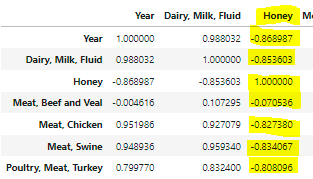

.

### 3. Have the production levels of each commodity in your category changed over time? - Linear Modeling / MANCOVA
### 4. Other relevant / interesting findings about your category?

When running a pair plot to analyze the existing relationships of the commodities with Honey we can see that most present a linear relationship to explore over time.

.

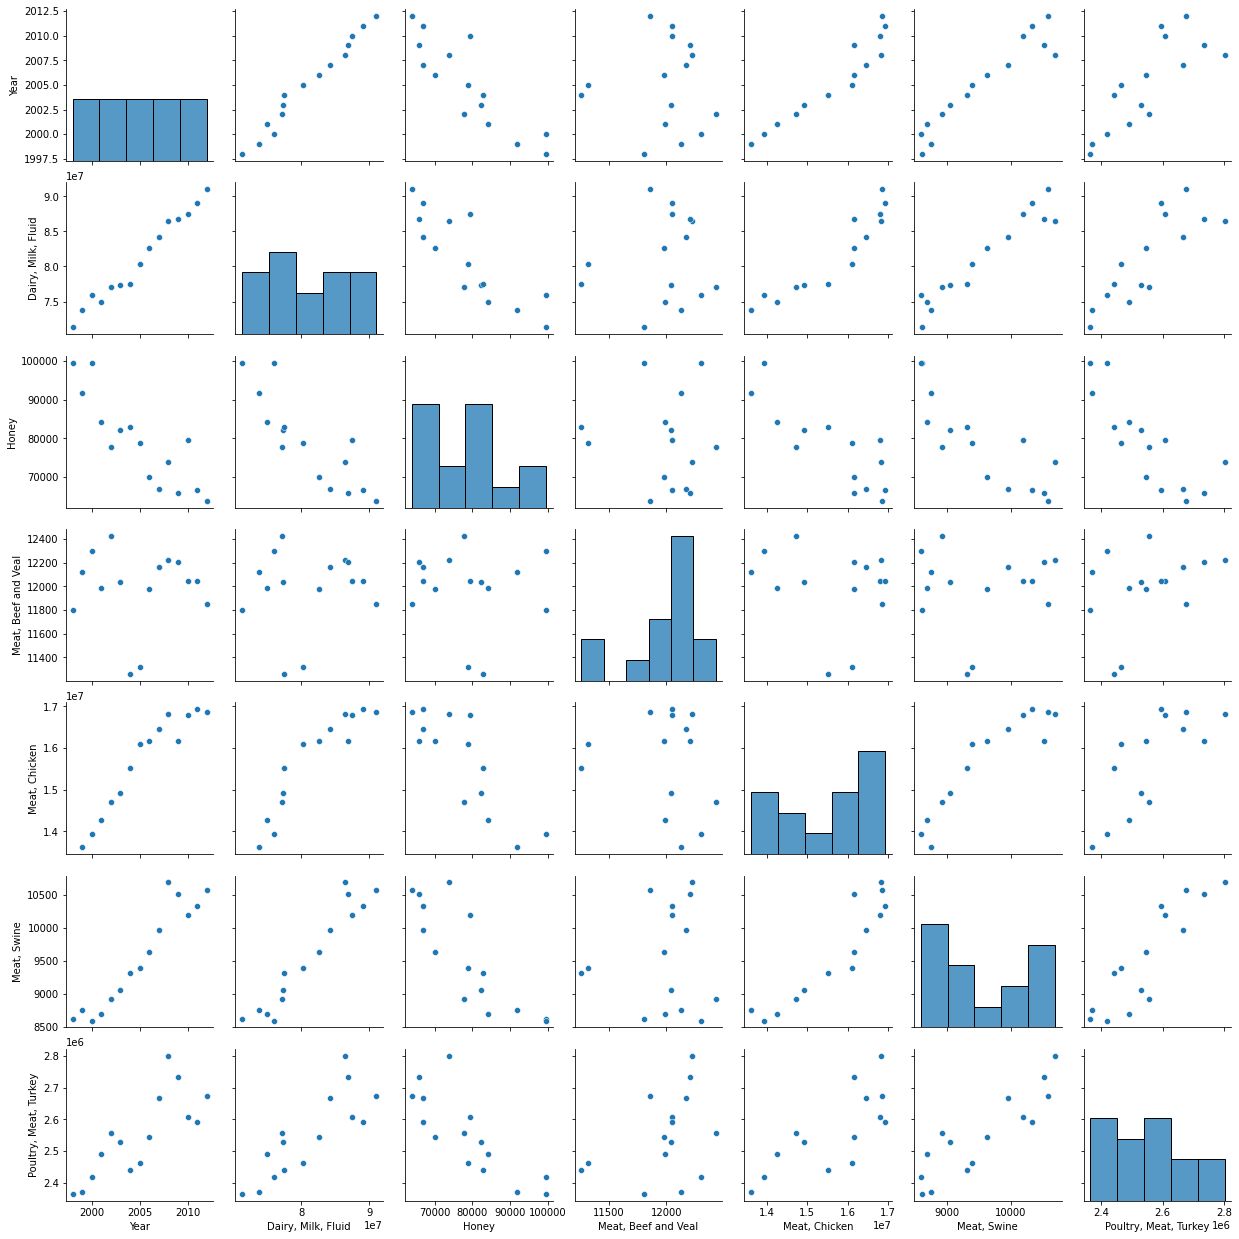

In [115]:
sns.pairplot(Cat1Pivot)

.

When we plot out the distribution and density of the production of these commodities over time:

.

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

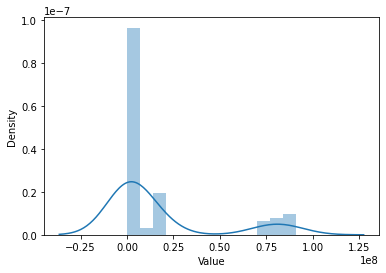

In [133]:
sns.distplot(Cat1['Value'])

We see that most of the value data lives between 0 - 0.2, and 0.73 - 0.9?
Representing very highly or low densities of commodity production in specified groupings. This will be further explored for the presence of 3rd variables that can be accounted for through research.

.

The distribution plot over each year in our report (specificall 1998 through 2012) presents us with value density around the same expected spikes.

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

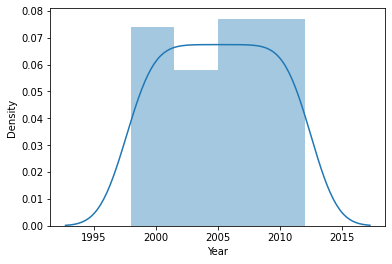

In [119]:
sns.distplot(Cat1['Year'])

.

### Linear regression

Define X and Y

In [167]:
x1 = Cat1['Year']
y = Cat1['Value']

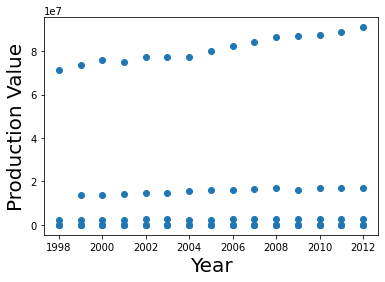

In [168]:
plt.scatter(x1,y)
 
plt.xlabel('Year', fontsize = 20)
 
plt.ylabel('Production Value', fontsize = 20)
 
plt.show()

In [171]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

In [172]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1328
Date:                Thu, 14 Jul 2022   Prob (F-statistic):              0.716
Time:                        17:48:09   Log-Likelihood:                -1657.4
No. Observations:                  89   AIC:                             3319.
Df Residuals:                      87   BIC:                             3324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.255e+08   1.49e+09     -0.353      0.725   -3.48e+09    2.43e+09
Year        2.703e+05   7.42e+05      0.364      0.716    -1.2e+06    1.74e+06
==============================================================================
Omnibus:                       29.717   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.574
Skew:                           1.663   Prob(JB):                     2.09e-10
Kurtosis:                       3.978   Cond. No.                     9.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

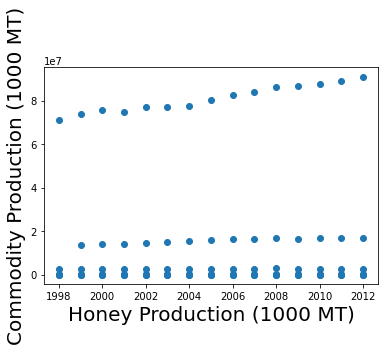

In [182]:
plt.scatter(x1,y)
 
plt.xlabel('Honey Production (1000 MT)', fontsize = 20)
 
plt.ylabel('Commodity Production (1000 MT)', fontsize = 20)
 
plt.show()

In [183]:
x = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1328
Date:                Thu, 14 Jul 2022   Prob (F-statistic):              0.716
Time:                        17:52:02   Log-Likelihood:                -1657.4
No. Observations:                  89   AIC:                             3319.
Df Residuals:                      87   BIC:                             3324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.255e+08   1.49e+09     -0.353      0.725   -3.48e+09    2.43e+09
Year        2.703e+05   7.42e+05      0.364      0.716    -1.2e+06    1.74e+06
==============================================================================
Omnibus:                       29.717   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.574
Skew:                           1.663   Prob(JB):                     2.09e-10
Kurtosis:                       3.978   Cond. No.                     9.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

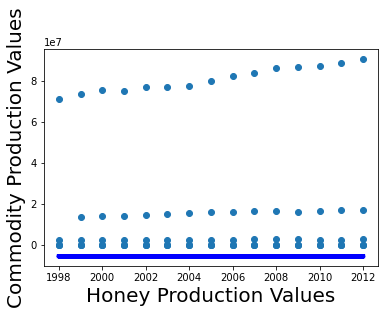

In [184]:
plt.scatter(x1,y)
 
yhat = -3027.7330*x1 + 530400
 
fig = plt.plot(x1,yhat, lw=4, c='blue', label = 'regression line')
 
plt.xlabel('Honey Production Values', fontsize = 20)
 
plt.ylabel('Commodity Production Values', fontsize = 20)
 
plt.show()

In [178]:
sms.diagnostic.het_breuschpagan(residual, Cat1[['Value']])

(84.44635753253385, nan, 1631.9417951576888, 1.362204289547764e-58)

In [179]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-11.961238714312934, pvalue=6.555444957406283e-20)

<AxesSubplot:>

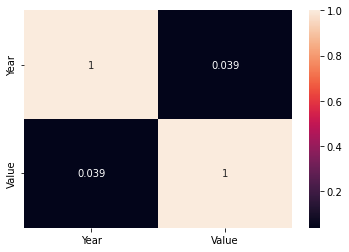

In [180]:
sns.heatmap(Cat1.corr(), annot=True)

# Further analysis inquiries

### What influences bee survival - explain negative correlation 3rd variables possibly?
### Does it have an impact how much? or not?

The presence of grazing animals?

Pesticides?

Habitat loss?

An increased number of predatory invaders?

.

# Visuals in Tableau
### Distribution of honey vs Dairy&livestock stuff
### histograms - value
### line graph - value trend over time

line graph done

Histogram done?, Dstribution is the only thing left

.

# Additional Notes for the project
### tableau for visuals